In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime 
import pickle

In [2]:
### load dataset
df_plays=pd.read_csv("/home/pedrozamboni/Documentos/doutorado/erodes_data_camp/nfl-big-data-bowl-2021/plays.csv")

In [3]:
### selecting features
new_df=df_plays[['quarter','down','yardsToGo','playType','personnelO','personnelD','playResult']]

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   quarter     19239 non-null  int64 
 1   down        19239 non-null  int64 
 2   yardsToGo   19239 non-null  int64 
 3   playType    19239 non-null  object
 4   personnelO  19210 non-null  object
 5   personnelD  19210 non-null  object
 6   playResult  19239 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [5]:
new_df['personnelD'].replace('', np.nan, inplace=True)
new_df.dropna(subset=['personnelD'], inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19210 entries, 0 to 19238
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   quarter     19210 non-null  int64 
 1   down        19210 non-null  int64 
 2   yardsToGo   19210 non-null  int64 
 3   playType    19210 non-null  object
 4   personnelO  19210 non-null  object
 5   personnelD  19210 non-null  object
 6   playResult  19210 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
new_df

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33
4,1,3,1,play_type_pass,"2 RB, 3 TE, 0 WR","6 DL, 3 LB, 2 DB",0
...,...,...,...,...,...,...,...
19234,3,2,5,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19235,4,3,7,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19236,1,3,4,play_type_unknown,"1 RB, 1 TE, 3 WR","1 DL, 5 LB, 5 DB",-10
19237,2,3,1,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",15


In [7]:
df_personnelO=df_plays.personnelO.value_counts().index[0:10]
df_presonnelD=df_plays.personnelD.value_counts().index[0:10]

In [8]:
### 10 def. that appear the most
new_df=new_df.loc[new_df['personnelD'].isin(df_presonnelD)]

In [9]:
### 10 off. that appear the most

new_df=new_df.loc[new_df['personnelO'].isin(df_personnelO)]

In [10]:
new_df

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4
...,...,...,...,...,...,...,...
19234,3,2,5,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19235,4,3,7,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19236,1,3,4,play_type_unknown,"1 RB, 1 TE, 3 WR","1 DL, 5 LB, 5 DB",-10
19237,2,3,1,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",15


In [11]:
### yards at the end of the play
new_df['runs']=new_df['playResult']-new_df['yardsToGo']

In [12]:
### if the team got the first down =1, else 0
new_df.loc[new_df['runs'] > 0, 'Categorical'] = 1
new_df.loc[new_df['runs'] <=0, 'Categorical'] = 0

In [13]:
new_df.head()

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0


In [14]:
new_df['playType'].unique()

array(['play_type_pass', 'play_type_sack', 'play_type_unknown'],
      dtype=object)

In [15]:
new_df[['play_pass','play_sack']] = pd.get_dummies(new_df['playType'])[['play_type_pass','play_type_sack']]

In [16]:
new_df.head()

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical,play_pass,play_sack
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0,1,0
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0,1,0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0,1,0


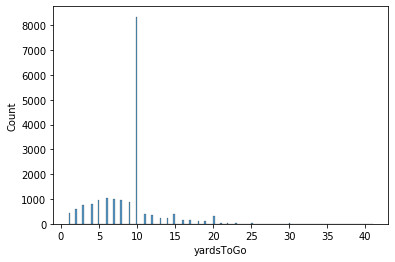

In [17]:
### if the team needs to run 10 yards 
### if the team needs to run less than 10
### if the team needs to run more than 10

sns.histplot(new_df['yardsToGo'])
new_df.loc[new_df['yardsToGo'] == 10, 'yards'] = 'ten_yards_togo'
new_df.loc[new_df['runs'] < 10, 'yards'] = 'less_than_ten_togo'
new_df.loc[new_df['runs'] > 10, 'yards'] = 'more_than_ten_togo'

In [18]:
new_df[['10_yards','less_than_10']] = pd.get_dummies(new_df['yards'])[['ten_yards_togo','less_than_ten_togo']]

In [19]:
new_df.head()

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical,play_pass,play_sack,yards,10_yards,less_than_10
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0,1,0,less_than_ten_togo,0,1
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0,less_than_ten_togo,0,1
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0,less_than_ten_togo,0,1
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0,1,0,more_than_ten_togo,0,0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0,1,0,less_than_ten_togo,0,1


In [20]:
new_df.personnelO.unique()


array(['2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR',
       '2 QB, 1 RB, 1 TE, 2 WR'], dtype=object)

In [21]:
new_df.personnelD.unique()

array(['4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB',
       '1 DL, 4 LB, 6 DB'], dtype=object)

In [22]:
new_df.personnelO.value_counts()

1 RB, 1 TE, 3 WR          13378
1 RB, 2 TE, 2 WR           2698
2 RB, 1 TE, 2 WR           1050
1 RB, 3 TE, 1 WR            392
1 RB, 0 TE, 4 WR            265
0 RB, 1 TE, 4 WR            162
2 RB, 2 TE, 1 WR            149
2 RB, 0 TE, 3 WR            147
6 OL, 1 RB, 1 TE, 2 WR      108
2 QB, 1 RB, 1 TE, 2 WR       56
Name: personnelO, dtype: int64

In [23]:
new_df.personnelD.value_counts()


4 DL, 2 LB, 5 DB    6581
3 DL, 3 LB, 5 DB    3084
4 DL, 3 LB, 4 DB    2329
2 DL, 4 LB, 5 DB    2094
4 DL, 1 LB, 6 DB    1081
3 DL, 2 LB, 6 DB    1037
2 DL, 3 LB, 6 DB     909
3 DL, 4 LB, 4 DB     716
1 DL, 4 LB, 6 DB     309
1 DL, 5 LB, 5 DB     265
Name: personnelD, dtype: int64

In [24]:
new_df[['2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR']]= pd.get_dummies(new_df['personnelO'])[['2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR']]

In [25]:
new_df[['4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB']]= pd.get_dummies(new_df['personnelD'])[['4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB']]

In [26]:
new_df

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical,play_pass,...,"1 RB, 0 TE, 4 WR","4 DL, 2 LB, 5 DB","4 DL, 1 LB, 6 DB","3 DL, 3 LB, 5 DB","4 DL, 3 LB, 4 DB","3 DL, 4 LB, 4 DB","2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 2 LB, 6 DB","1 DL, 5 LB, 5 DB"
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0,1,...,0,0,1,0,0,0,0,0,0,0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,3,2,5,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5,0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
19235,4,3,7,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5,-2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
19236,1,3,4,play_type_unknown,"1 RB, 1 TE, 3 WR","1 DL, 5 LB, 5 DB",-10,-14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
19237,2,3,1,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",15,14,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
x_df=new_df[['quarter','down','10_yards','less_than_10','play_pass','play_sack','2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR','4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB' ]]
y_df=new_df['Categorical']

In [28]:
x_df=x_df.to_numpy()
y_df=y_df.to_numpy()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [30]:
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)

In [31]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print("Our model has a ",
      accuracy_score(y_test, pred),
      "% accuracy on the test set with k=",i)

Our model has a  0.6805736636245111 % accuracy on the test set with k= 1
Our model has a  0.7707518470230335 % accuracy on the test set with k= 2
Our model has a  0.7086049543676662 % accuracy on the test set with k= 3
Our model has a  0.7679269882659713 % accuracy on the test set with k= 4
Our model has a  0.7394611038678836 % accuracy on the test set with k= 5
Our model has a  0.7859626249456758 % accuracy on the test set with k= 6
Our model has a  0.7846588439808779 % accuracy on the test set with k= 7
Our model has a  0.7935680139069969 % accuracy on the test set with k= 8
Our model has a  0.7885701868752716 % accuracy on the test set with k= 9
Our model has a  0.7900912646675359 % accuracy on the test set with k= 10
Our model has a  0.7903085614950022 % accuracy on the test set with k= 11
Our model has a  0.7966101694915254 % accuracy on the test set with k= 12
Our model has a  0.7987831377661886 % accuracy on the test set with k= 13
Our model has a  0.7974793568013907 % accuracy 

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred =log_reg.predict(X_test)
accuracy_score(y_test, pred)

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8055193394176445

In [33]:
max_depths=[1,2,3,4,5,6,7,8,9,10,20,30,50,100,500,1000]
for j in range(len(max_depths)):
    rd_cfl=DecisionTreeClassifier(max_depth = max_depths[j], random_state=614)
    rd_cfl.fit(X_train,y_train)
    y_pred=rd_cfl.predict(X_test)
    print("Our model has a ",
  accuracy_score(y_test, pred),
"% accuracy on the test set with depth:",max_depths[j])

Our model has a  0.8055193394176445 % accuracy on the test set with depth: 1
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 2
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 3
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 4
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 5
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 6
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 7
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 8
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 9
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 10
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 20
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 30
Our model has a  0.8055193394176445 % accuracy on the test set with depth

In [34]:
max_depths=[1,2,3,4,5,6,7,8,9,10,20,30,50,100,500,1000]
for j in range(len(max_depths)):
    rd_cfl=RandomForestClassifier(max_depth = max_depths[j], random_state=614)
    rd_cfl.fit(X_train,y_train)
    y_pred=rd_cfl.predict(X_test)
    print("Our model has a ",
  accuracy_score(y_test, pred),
"% accuracy on the test set with depth:",max_depths[j])

Our model has a  0.8055193394176445 % accuracy on the test set with depth: 1
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 2
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 3
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 4
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 5
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 6
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 7
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 8
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 9
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 10
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 20
Our model has a  0.8055193394176445 % accuracy on the test set with depth: 30
Our model has a  0.8055193394176445 % accuracy on the test set with depth

In [35]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred =clf.predict(X_test)
print("Our model has a ",
  np.round(sum(pred == y_test)/len(y_test)*100,2),
  "% accuracy on the training set with ")


Our model has a  80.55 % accuracy on the training set with 


In [36]:
svc = svm.SVC(kernel = "sigmoid", coef0 = 1)

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("Our model has a ",
  np.round(sum(pred == y_test)/len(y_test)*100,2),
  "% accuracy on the test set with ")


Our model has a  80.55 % accuracy on the test set with 


In [38]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
                [('lr',LogisticRegression()),
                ('rf',RandomForestClassifier()),
                ('svm',svm.SVC()),
                ('knn',KNeighborsClassifier())],
                voting = "hard")

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)
sum(y_test == y_pred)/len(y_pred)

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8055193394176445

In [39]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(svm.SVC(),
                            bootstrap = True)

paste_clf = BaggingClassifier(svm.SVC(),
                            bootstrap = False )

In [40]:
# Fit Bagged Data
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("Bagging Accuracy", np.round(acc,5))

## Fit Paste Data
paste_clf.fit(X_train,y_train)
y_pred = paste_clf.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("Pasting Accuracy", np.round(acc,5))

Bagging Accuracy 0.80552
Pasting Accuracy 0.80552


In [79]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(13803, 24) (4602, 24)
(13803,) (4602,)


In [106]:
import tensorflow as tf
from tensorflow import keras


model= tf.keras.models.Sequential([tf.keras.layers.Dense(units=500,activation='relu',input_dim=24),
                                   tf.keras.layers.SimpleRNN(50, return_sequences=False),
                                   tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.initializers.zeros)])


model.summary()

ValueError: Input 0 of layer simple_rnn_8 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 500)

In [102]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train,
          validation_split=0.1,
          epochs=20)

Epoch 1/20


ValueError: in user code:

    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:839 train_function  *
        return step_function(self, iterator)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:829 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1262 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2734 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3423 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:822 run_step  **
        outputs = model.train_step(data)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 train_step
        y_pred = self(x, training=True)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1018 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/pedrozamboni/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_16 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 24)
